In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_rows', 500)

In [11]:
import sys
sys.path.append("..")

from EDA_ML_Package.EDA_functions import Data_Analysis
from EDA_ML_Package.ML_functions import ML_models
from EDA_ML_Package.NN_functions import ANN_tabular_class
from EDA_ML_Package.PDF_report import PDF_reporting

pd.set_option('display.max_rows', 500)


DA = Data_Analysis()
PDF = PDF_reporting()

In [12]:
PDF.add_text("Health Insurance Cross Sell Prediction", style="Heading1", fontsize=24)
PDF.add_text("Predict Health Insurance Owners' who will be interested in Vehicle Insurance", style="Heading2", fontsize=20)
PDF.add_text("Predict Health Insurance Owners' who will be interested in Vehicle Insurance", fontsize=12)

PDF.add_text("https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv", style="Heading3", fontsize=12)

PDF.add_text("Description", style="Heading3", fontsize=14)

description_dict = {"id": "Unique ID for the customer",
                    "Product_Info_1-7": "A set of normalized variables relating to the product applied for",
                    "Ins_Age": "Normalized age of applicant",
                    "Ht": "Normalized height of applicant",
                    "Wt": "Normalized weight of applicant",
                    "BMI": "Normalized BMI of applicant",
                    "Employment_Info_1-6": "A set of normalized variables relating to the employment history of the applicant.",
                    "InsuredInfo_1-6": "A set of normalized variables providing information about the applicant.",
                    "Insurance_History_1-9": "A set of normalized variables relating to the insurance history of the applicant.",
                    "Family_Hist_1-5": "A set of normalized variables relating to the family history of the applicant.",
                    "Medical_History_1-41": "A set of normalized variables relating to the medical history of the applicant.",
                    "Medical_Keyword_1-48": "A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.",
                    "Response": "1 : Customer is interested, 0 : Customer is not interested"}

df_description = pd.DataFrame.from_dict(description_dict, orient='index')
df_description = df_description.reset_index()

PDF.table_in_PDF(df_description)



In [13]:
df = pd.read_csv("Prudential Life Insurance Assessment.csv")

print(df.head(5))

   Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0            

In [14]:
df_ds = DA.descriptive_analysis(df, target_attribute='Response', describe_opt=0)

PDF.add_text("Data Characteristics", style="Heading3", fontsize=14)

PDF.table_in_PDF(df_ds)



number of attributes:  128 / number of instances:  59381 

                   index    NaN NaN % Unique     type   memory  \
0                     Id      0   0.0  59381    int64   475048   
1         Product_Info_1      0   0.0      2    int64   475048   
2         Product_Info_2      0   0.0     19   object  3503479   
3         Product_Info_3      0   0.0     34    int64   475048   
4         Product_Info_4      0   0.0     99  float64   475048   
5         Product_Info_5      0   0.0      2    int64   475048   
6         Product_Info_6      0   0.0      2    int64   475048   
7         Product_Info_7      0   0.0      3    int64   475048   
8                Ins_Age      0   0.0     65  float64   475048   
9                     Ht      0   0.0     39  float64   475048   
10                    Wt      0   0.0     76  float64   475048   
11                   BMI      0   0.0     89  float64   475048   
12     Employment_Info_1     19   0.0     83  float64   475048   
13     Employmen


Value Distribution of the Target attribute

  Response  count  percentage  Pop Per
0        1   6207       10.45    100.0
1        2   6552       11.03    100.0
2        3   1013        1.71    100.0
3        4   1428        2.40    100.0
4        5   5432        9.15    100.0
5        6  11233       18.92    100.0
6        7   8027       13.52    100.0
7        8  19489       32.82    100.0


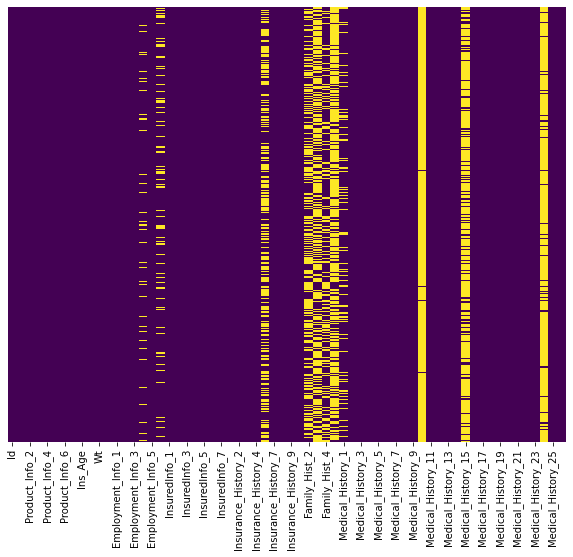

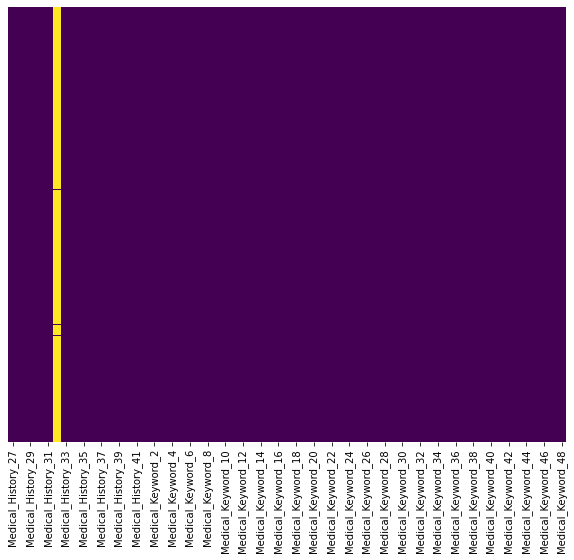

In [15]:
DA.nan_heatmap(df)

In [16]:
print(df.columns)

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)


In [17]:
df = df.drop(['Family_Hist_3'], 1)
df = df.drop(['Family_Hist_5'], 1)
df = df.drop(['Medical_History_10'], 1)
df = df.drop(['Medical_History_15'], 1)
df = df.drop(['Medical_History_24'], 1)
df = df.drop(['Medical_History_32'], 1)


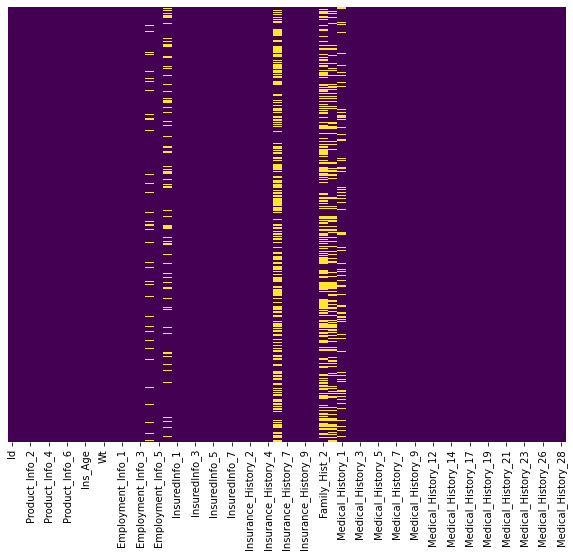

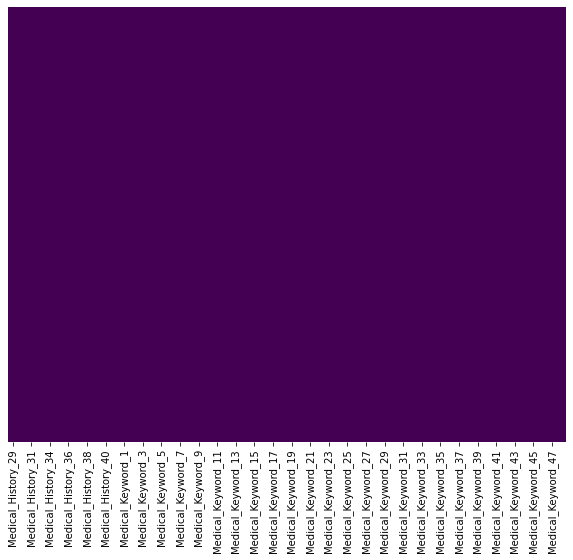

In [18]:
DA.nan_heatmap(df)

ValueError: The 'color' keyword argument must have one color per dataset, but 8 datasets and 3 colors were provided

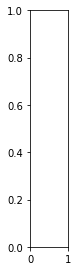

In [20]:
img_hist_obj = DA.box_hist_EDA_plots(df, plot_type='hist', target_att="Response", density_v=True, no_rows=4)
PDF.add_text("Density Histogram Plot", style="Heading3", fontsize=14)
PDF.image_in_PDF(img_hist_obj, x=7, y=4)

img_hist_obj = DA.box_hist_EDA_plots(df, plot_type='hist', target_att="Response", density_v=False, no_rows=4)
PDF.add_text("Count Histogram Plot", style="Heading3", fontsize=14)
PDF.image_in_PDF(img_hist_obj, x=7, y=4)

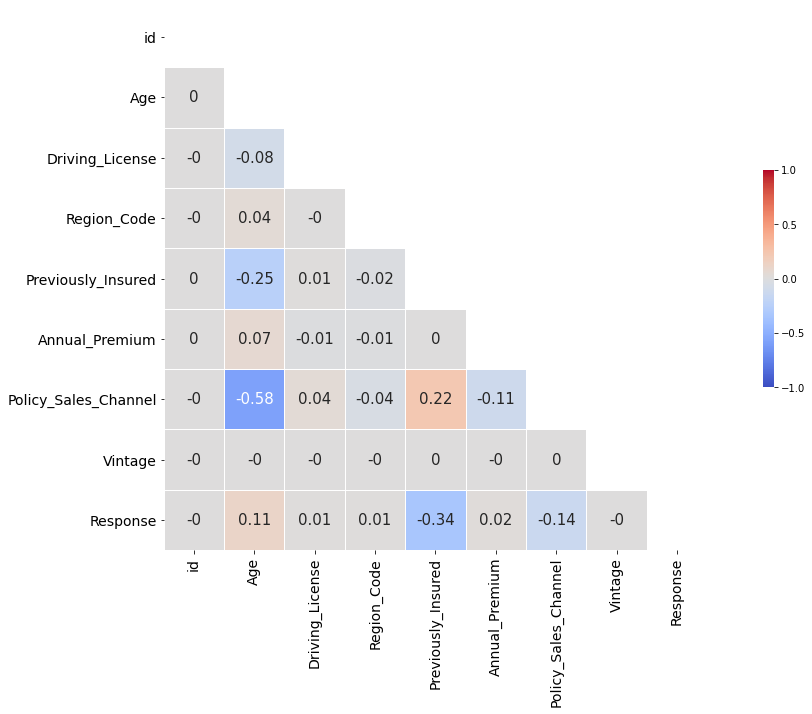

In [49]:
img_obj = DA.heatmap_corr_plot(df)
PDF.add_text("Correlation Heatmap", style="Heading3", fontsize=14)
PDF.image_in_PDF(img_obj, x=12, y=6)

In [50]:
print(df.columns)
df = df.drop(['id'], 1)
X = df.drop(['Response'], 1)
y = df['Response']

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [51]:
print('Original Class 0: ', len(df[df['Response']==0]))
print('Original Class 1: ', len(df[df['Response']==1]))

# balancing the data by Undesampling of the dominant class
df1 = df[df.Response == 1].head(1000)
df0 = df[df.Response == 0].head(1000)
df0 = df0.sample(n=len(df1), random_state=42)
df_under = pd.concat([df0, df1])
    
X = df_under.drop(['Response'], 1)
y = df_under['Response']

print('Under Class 0: ', len(df_under[df_under['Response']==0]))
print('Under Class 1: ', len(df_under[df_under['Response']==1]))



Original Class 0:  334399
Original Class 1:  46710
Under Class 0:  1000
Under Class 1:  1000


In [52]:
X_tr, pipeline_tr = DA.data_transformation(X, cat_type=0)
DA.nan_heatmap(X_tr)
print(X_tr.columns)

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'x0_Female',
       'x0_Male', 'x1_1-2 Year', 'x1_< 1 Year', 'x1_> 2 Years', 'x2_No',
       'x2_Yes'],
      dtype='object')


In [53]:
# Cleansing Column names
for clm in X_tr.columns:
    clm_new = clm.replace("<", "less")
    clm_new = clm_new.replace(">", "more")
    if clm_new[-1] == " ":
        clm_new = clm_new[:-1]
    X_tr = X_tr.rename(columns={clm: clm_new})

print(X_tr.columns)

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'x0_Female',
       'x0_Male', 'x1_1-2 Year', 'x1_less 1 Year', 'x1_more 2 Years', 'x2_No',
       'x2_Yes'],
      dtype='object')


In [54]:
ML = ML_models()


--------------------------------------------------------------


ROC Curve


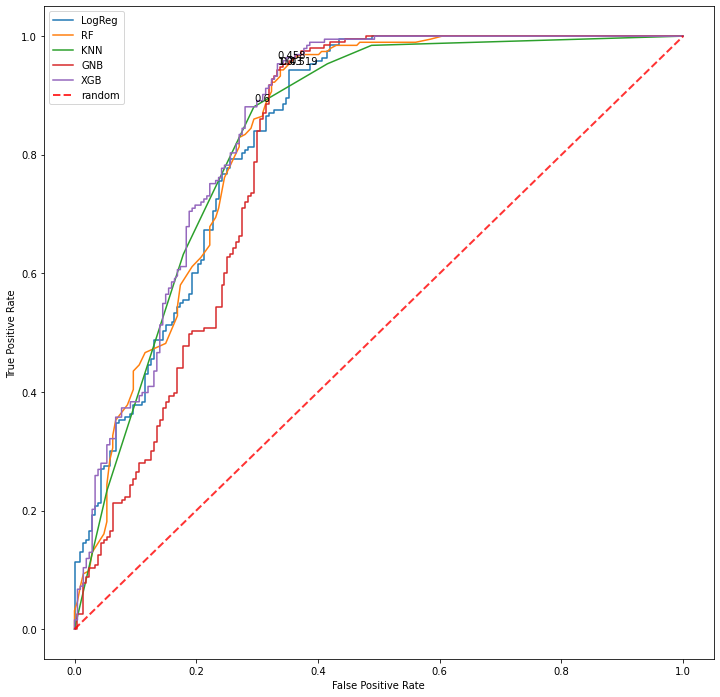

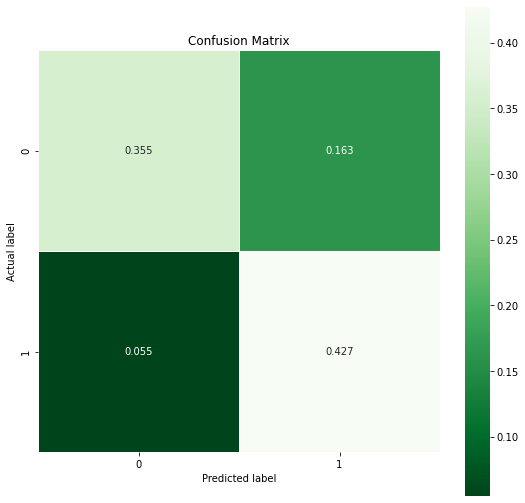

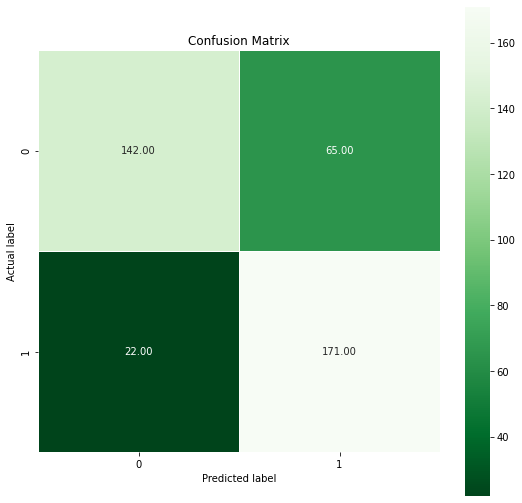

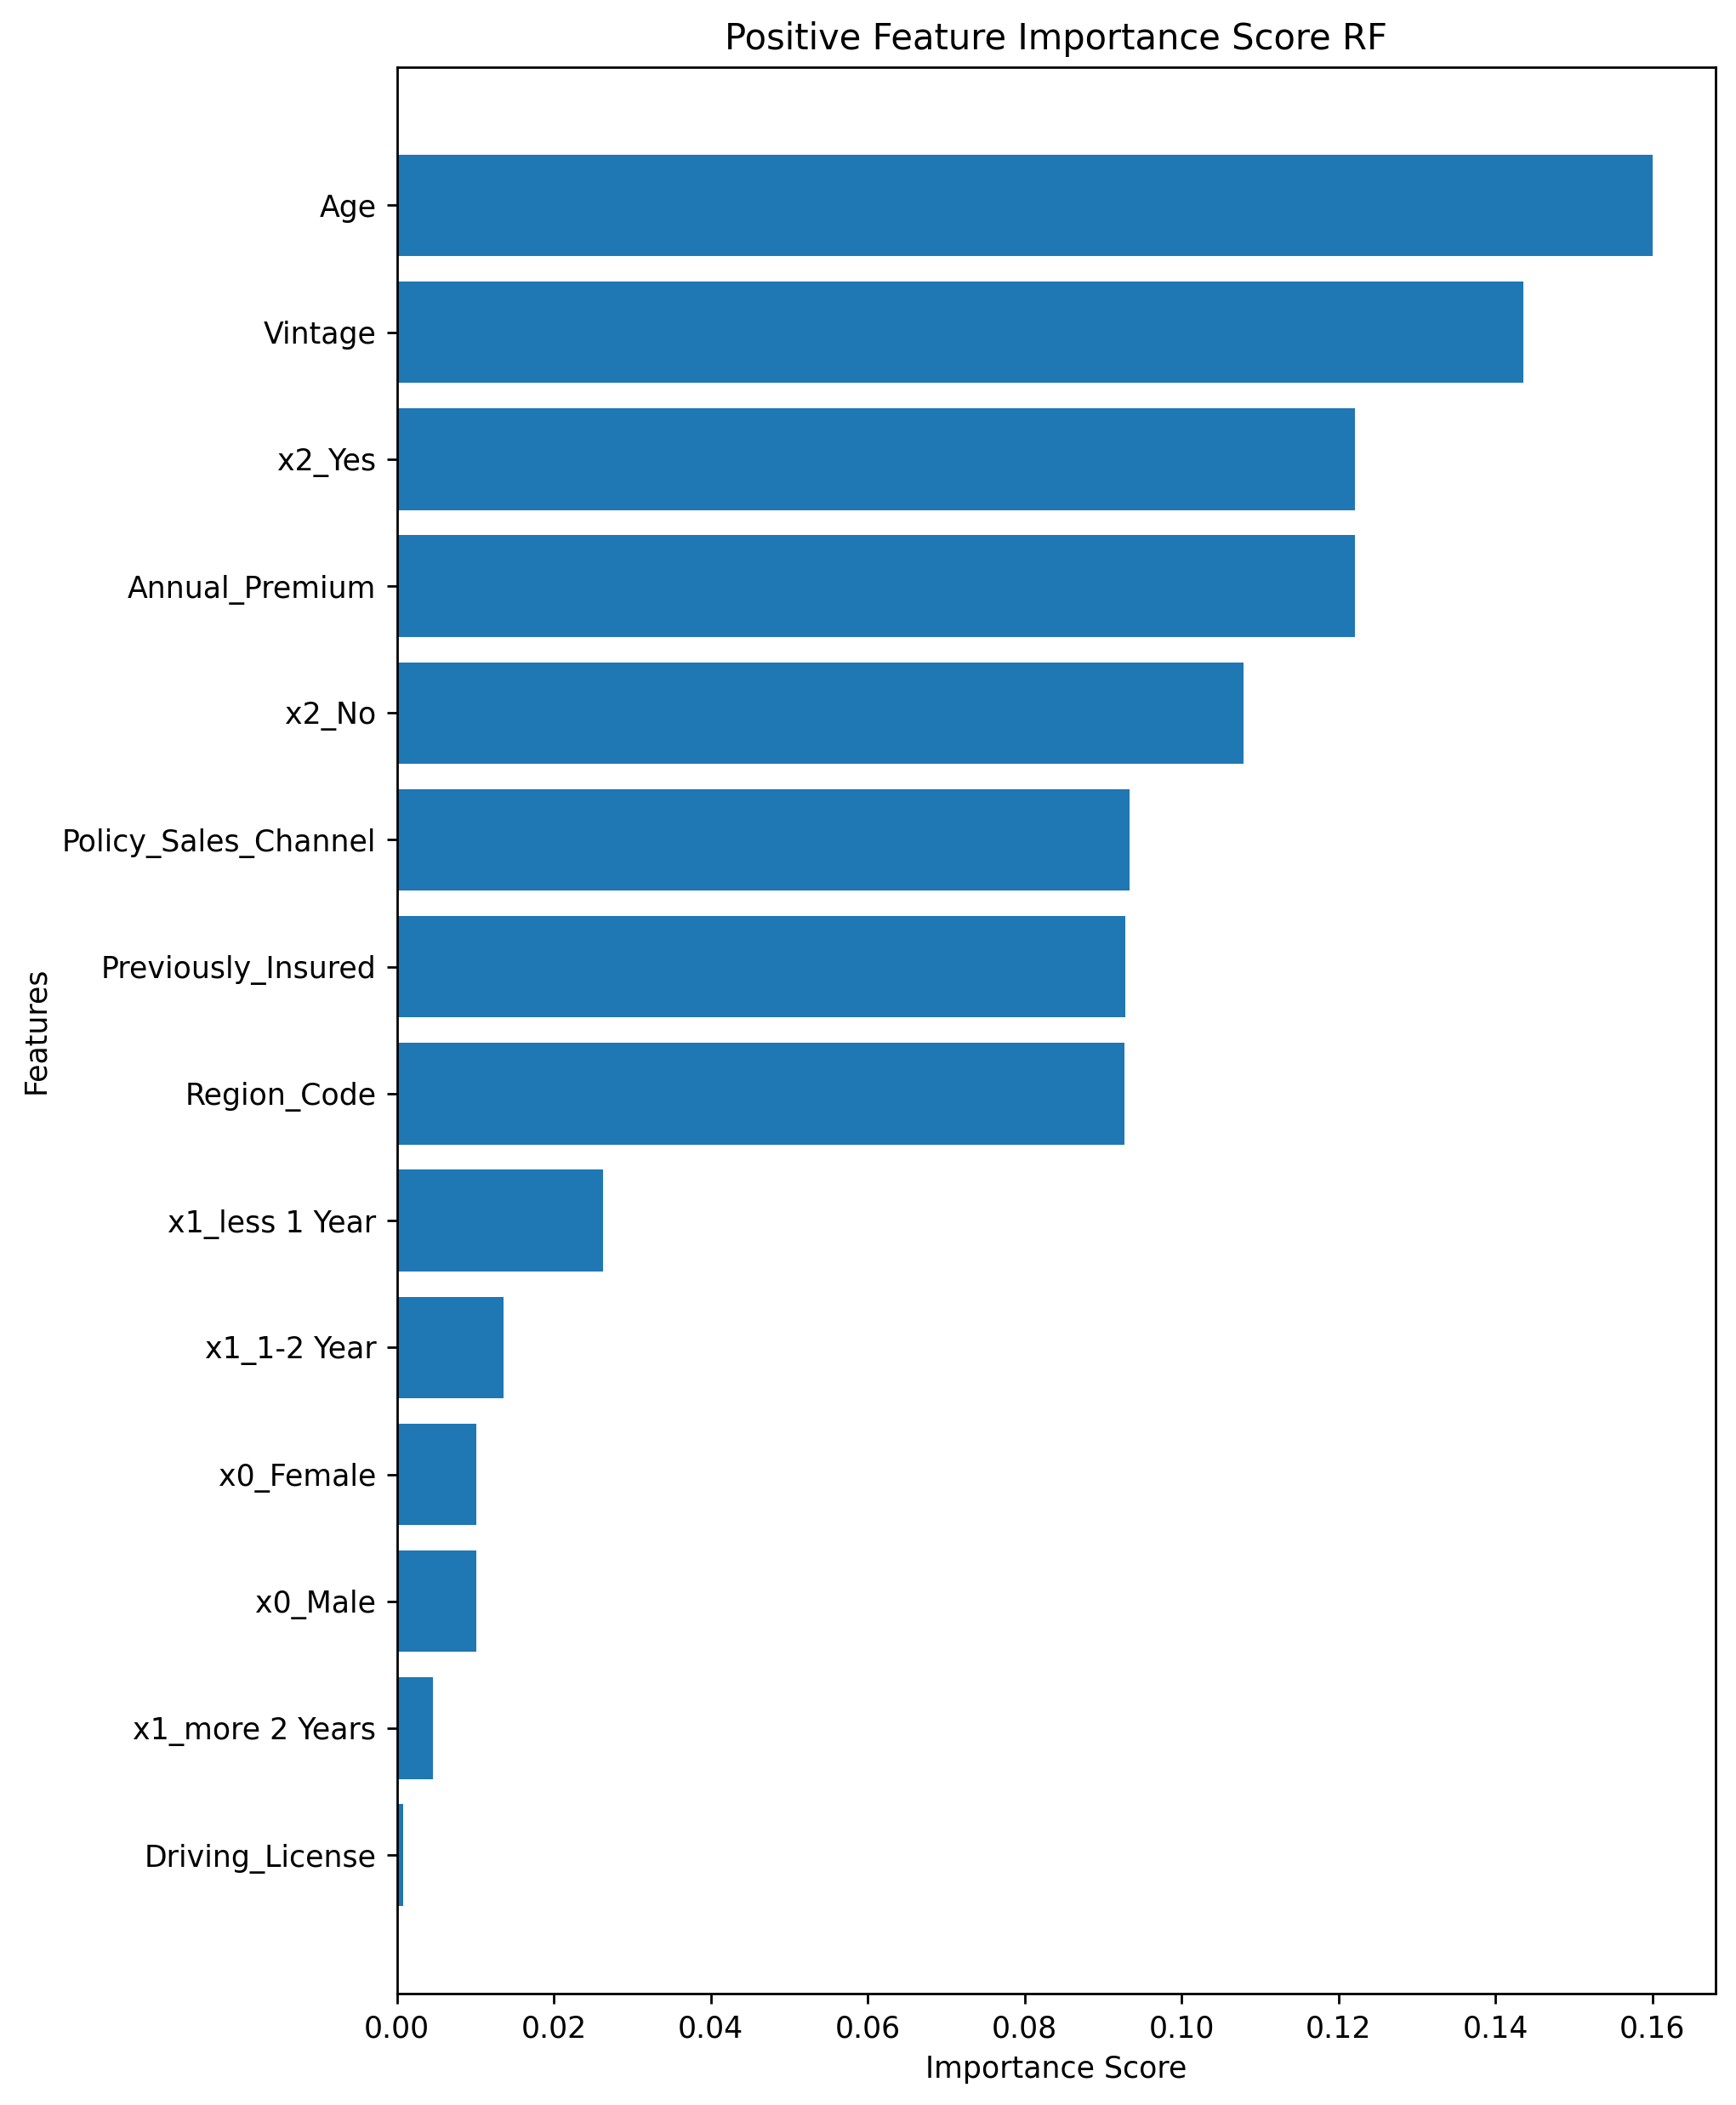


 ================ ML Analysis Completed ================
    model    acc  precision  recall     f1 dtype  fit_tm  score_tm
4     XGB  0.798      0.726   0.933  0.816  test     NaN       NaN
0  LogReg  0.790      0.714   0.943  0.812  test     NaN       NaN
3     GNB  0.775      0.686   0.984  0.809  test     NaN       NaN
2     KNN  0.790      0.736   0.881  0.802  test     NaN       NaN
1      RF  0.782      0.725   0.886  0.797  test     NaN       NaN
8     GNB  0.781      0.703   0.978  0.818    cv   0.006     0.010
9     XGB  0.796      0.741   0.914  0.818    cv   0.284     0.013
5  LogReg  0.781      0.720   0.931  0.811    cv   0.108     0.014
6      RF  0.777      0.732   0.881  0.799    cv   0.585     0.043
7     KNN  0.762      0.724   0.854  0.783    cv   0.013     0.045


<Figure size 432x288 with 0 Axes>

In [55]:
results_under, img_objs = ML.ML_Basic_Models(X_tr, y)

In [56]:
for img_obj in img_objs:
    PDF.image_in_PDF(img_obj, x=4, y=4)

In [57]:
PDF.add_text("Basic ML Results", style="Heading3", fontsize=14)
PDF.table_in_PDF(results_under)

In [58]:
PDF.generate_report('Prudential')